**Update:** Copied EDA piece from Elisia's notebook for consistency.

In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from matplotlib import colormaps

from datetime import date

pd.set_option('display.max_columns', None)

import matplotlib.colors as mcolors

**Data has been partially cleaned in Excel:**
- Removed blank 'Code X' columns
- Combined testing date columns into one, as all testing occurs at the same time.
- Combined examiner columns into one, , as all testing occurs at the same time.
- Removed 3 rows with no scoring data (2 are likely duplicates anyway)

In [2]:
evals= pd.DataFrame(pd.read_excel('../data/bdi3_all_evals_clean.xlsx'))
evals.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

Add Age at Testing column

In [3]:
evals['Age at Testing'] = ((evals['Date of Testing'] - evals['Date of Birth']).dt.days) / 365
evals['months'] = (evals['Age at Testing'] * 12).apply(int)
evals['years'] = (evals['months'] / 12).apply(int)
evals.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Date of Testing,Examiner,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Communication CSS 90%,Communication-Receptive Communication Z-Score,Communication-Receptive Communication T-Score,Communication-Receptive Communication NCE,Communication-Expressive Communication RS,Communication-Expressive Communication SS,Communication-Expressive Communication PR,Communication-Expressive Communication AE,Communication-Expressive Communication RDI,Communication-Expressive Communication CSS,Communication-Expressive Communication CSS 90%,Communication-Expressive Communication Z-Score,Communication-Expressive Comm

Clean RDI Column

In [4]:
# Andri's function to clean RDI
def clean_rdi(column):
    months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    adaptive_rdi = evals[column].str[0:-3]
    adaptive_rdi = [months[i] if i in months.keys() else i for i in adaptive_rdi] 
    adaptive_rdi = [0 if str(i)[0:1] == '<' else i for i in adaptive_rdi] 
    adaptive_rdi = [100 if str(i)[0:1] == '>' else i for i in adaptive_rdi] 
    adaptive_rdi = pd.to_numeric(adaptive_rdi)
    return adaptive_rdi

In [5]:
for column in evals.columns:
    if 'RDI' in column:
        evals[column] = clean_rdi(column)

Convert text columns to strings

In [6]:
evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Examiner']] = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Examiner']].astype('string')

In [7]:
def string_clean(column):
    x = evals[column].astype('string')
    return x

In [8]:
for column in evals.columns:
    if 'Interval' in column:
        evals[column] = string_clean(column)

Add eligibility column

In [9]:
# Using Amy's function to create column with eligibility
def filter(x):
    if x <= 70:
        return '40% delay'
    if (x >= 71 and x <= 78):
        return '25% delay'
    if x >= 79:
        return 'not eligible'
#applying the filter function to 'Salary' column 
evals['Eligibility'] = evals['BDI-3 Total Developmental Quotient'].apply(filter)

Looking into why average Communication scores drop as children get older

In [10]:
comm_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Communication Developmental Quotient', 'Communication Percentile Rank', 'Communication RDI']].dropna()
comm_scores.head()

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Communication Developmental Quotient,Communication Percentile Rank,Communication RDI
0,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
1,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
2,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,46.0,<0.1,0.0
3,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,46.0,<0.1,0.0
4,M,Memphis Delta,BDI-3 Annual Evaluation,3.306849,39,3,52.0,0.1,0.0


In [11]:
comm_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18083 entries, 0 to 23941
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                18083 non-null  string 
 1   Location - Sub Level 1                18083 non-null  string 
 2   Program Label                         18083 non-null  string 
 3   Age at Testing                        18083 non-null  float64
 4   months                                18083 non-null  int64  
 5   years                                 18083 non-null  int64  
 6   Communication Developmental Quotient  18083 non-null  float64
 7   Communication Percentile Rank         18083 non-null  object 
 8   Communication RDI                     18083 non-null  float64
dtypes: float64(3), int64(2), object(1), string(3)
memory usage: 1.4+ MB


In [12]:
comm_scores.sort_values(by = ['Communication Developmental Quotient', 'Age at Testing'], ascending = [False, False])

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Communication Developmental Quotient,Communication Percentile Rank,Communication RDI
23926,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,154.0,>99.9,100.0
23927,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,154.0,>99.9,100.0
23931,M,Upper Cumberland,BDI-3 Annual Evaluation,1.545205,18,1,151.0,>99.9,100.0
23932,M,Upper Cumberland,BDI-3 Annual Evaluation,1.545205,18,1,151.0,>99.9,100.0
23097,M,Upper Cumberland,BDI-3 Eligibility Evaluation,0.147945,1,0,148.0,99.9,100.0
...,...,...,...,...,...,...,...,...,...
12390,M,Southwest,BDI-3 Annual Evaluation,1.194521,14,1,46.0,<0.1,0.0
12391,M,Southwest,BDI-3 Annual Evaluation,1.194521,14,1,46.0,<0.1,0.0
1361,M,First Tennessee,BDI-3 Eligibility Evaluation,1.169863,14,1,46.0,<0.1,0.0
5630,M,East Tennessee,BDI-3 Eligibility Evaluation,0.953425,11,0,46.0,<0.1,0.0


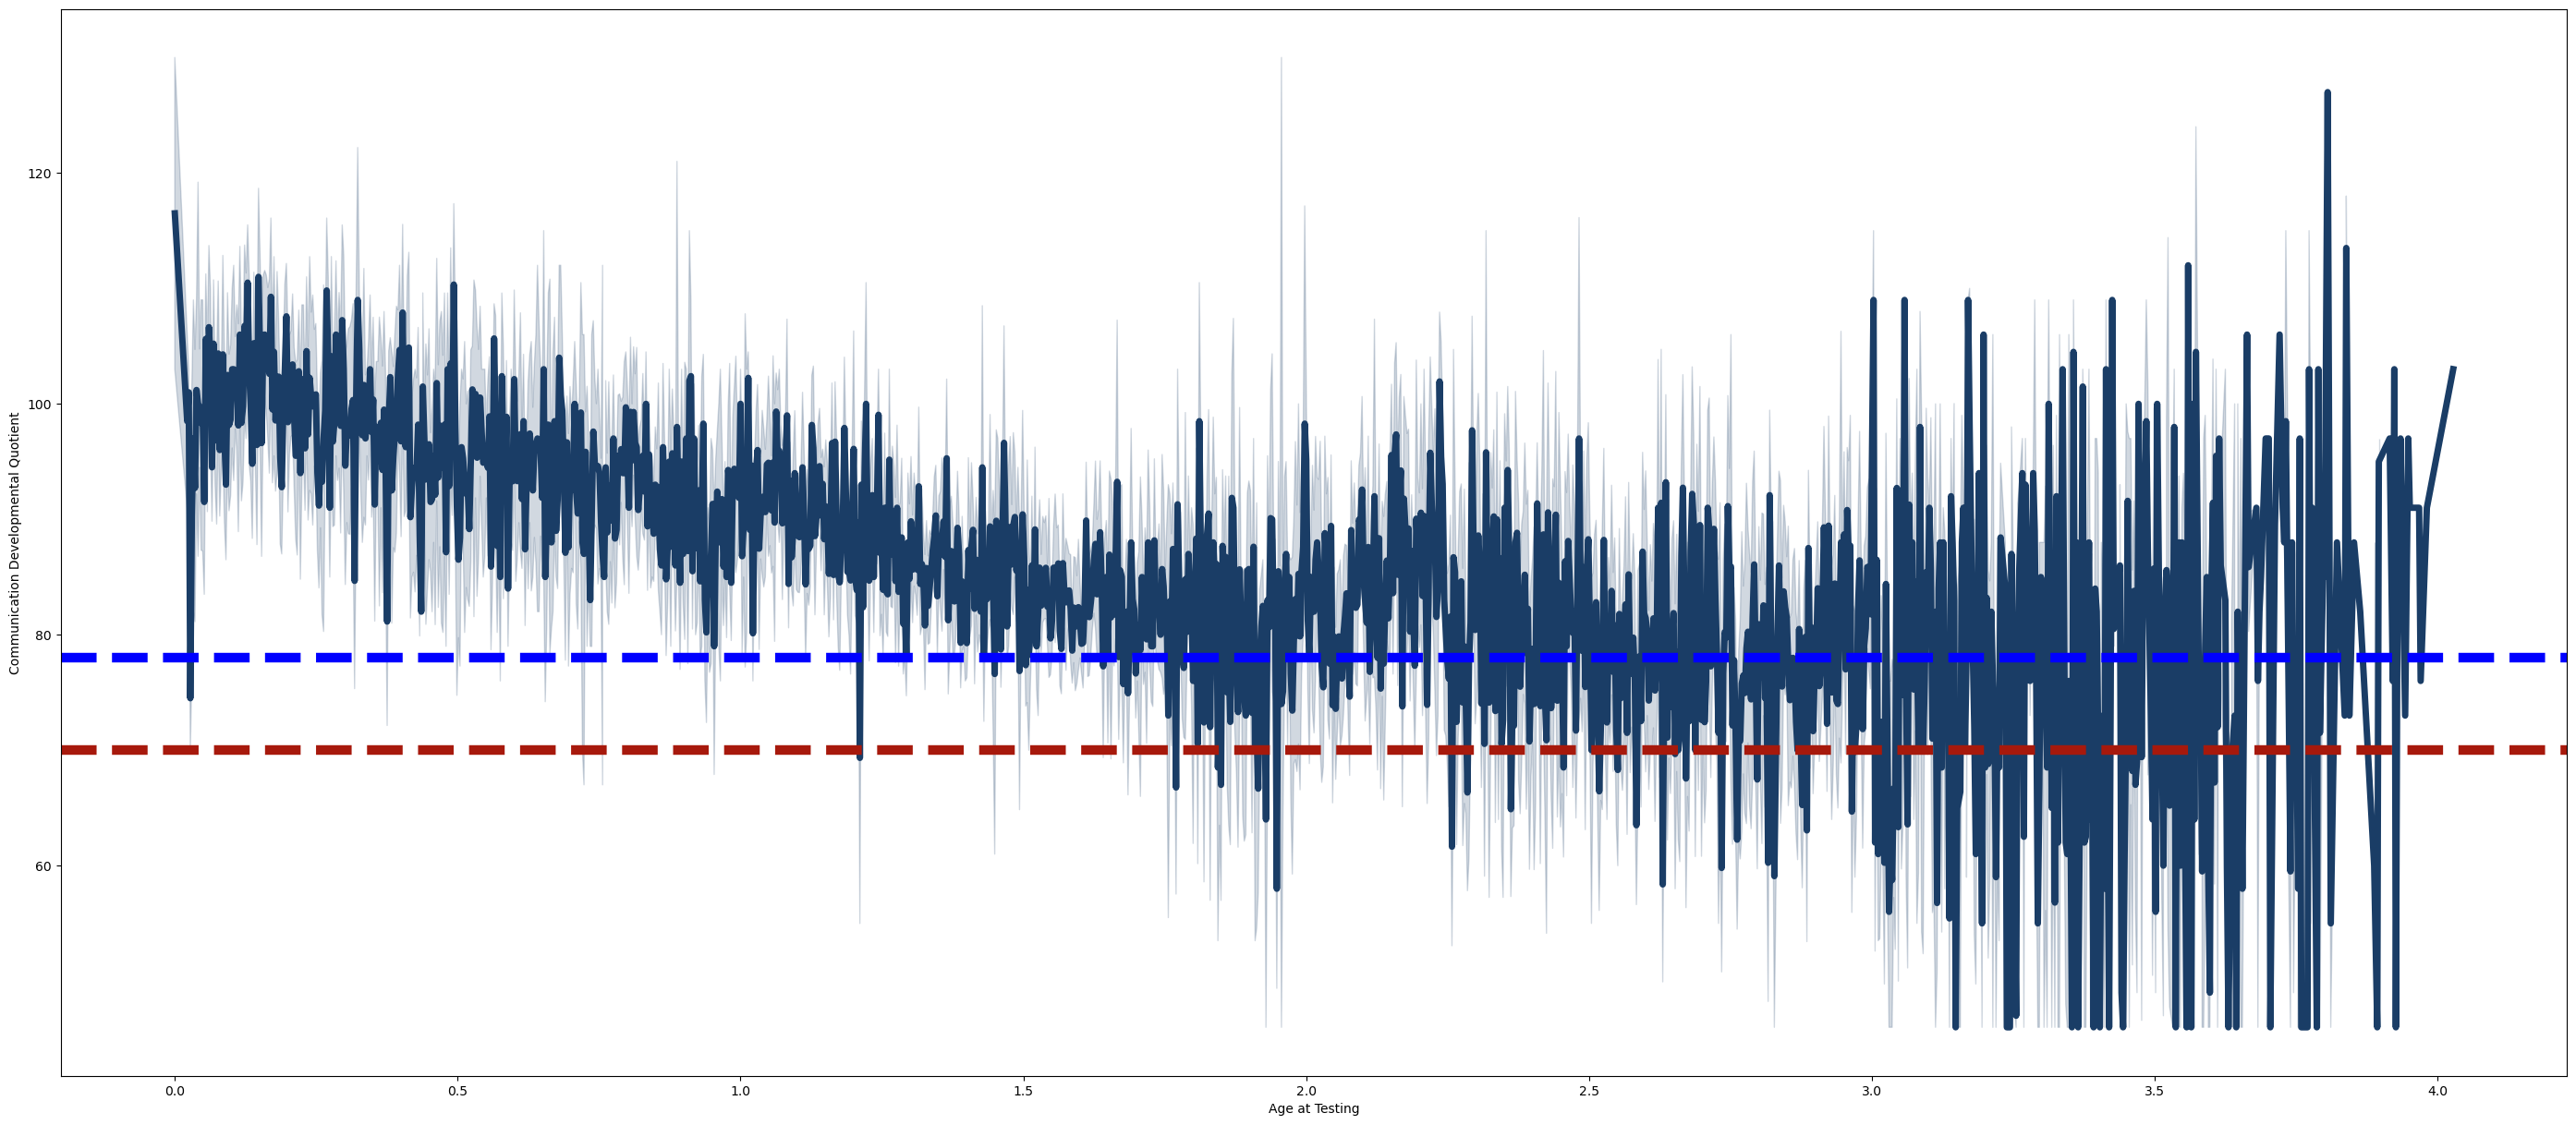

In [13]:
plt.figure(figsize=(35,15))

sns.lineplot(data=comm_scores, x='Age at Testing', y='Communication Developmental Quotient', color='#1A3D66', linewidth=5)
#plt.title('Communication Scores by Age', fontsize=15)
plt.axhline(y=78, label='25% Delay', linestyle='--', color='blue', linewidth=7.5)
plt.axhline(y=70, label='40% Delay', linestyle='--', color='#a7190c', linewidth=7.5)

plt.savefig('../Plots/Communication_Scores.png')
plt.show()

Same process for Adaptive scores

In [14]:
adapt_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Adaptive Developmental Quotient', 'Adaptive Percentile Rank', 'Adaptive RDI']].dropna()
adapt_scores.head()

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive RDI
0,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
1,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
2,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,46.0,<0.1,0.0
3,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,46.0,<0.1,0.0
6,M,South Central,BDI-3 Annual Evaluation,3.753425,45,3,46.0,<0.1,0.0


In [15]:
adapt_scores.sort_values(by = ['Adaptive Developmental Quotient', 'Age at Testing'], ascending = [False, False])

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive RDI
23937,F,South Central,BDI-3 Annual Evaluation,3.041096,36,3,148.0,99.9,100.0
23938,F,South Central,BDI-3 Annual Evaluation,3.041096,36,3,148.0,99.9,100.0
23935,F,Greater Nashville,BDI-3 Annual Evaluation,2.909589,34,2,148.0,99.9,100.0
23936,F,Greater Nashville,BDI-3 Annual Evaluation,2.909589,34,2,148.0,99.9,100.0
23934,F,Southwest,BDI-3 Eligibility Evaluation,2.369863,28,2,148.0,99.9,100.0
...,...,...,...,...,...,...,...,...,...
255,M,Greater Nashville,BDI-3 Annual Evaluation,2.052055,24,2,46.0,<0.1,0.0
269,F,Greater Nashville,BDI-3 Annual Evaluation,2.046575,24,2,46.0,<0.1,0.0
270,F,Greater Nashville,BDI-3 Annual Evaluation,2.046575,24,2,46.0,<0.1,0.0
312,F,Memphis Delta,BDI-3 Eligibility Evaluation,2.046575,24,2,46.0,<0.1,0.0


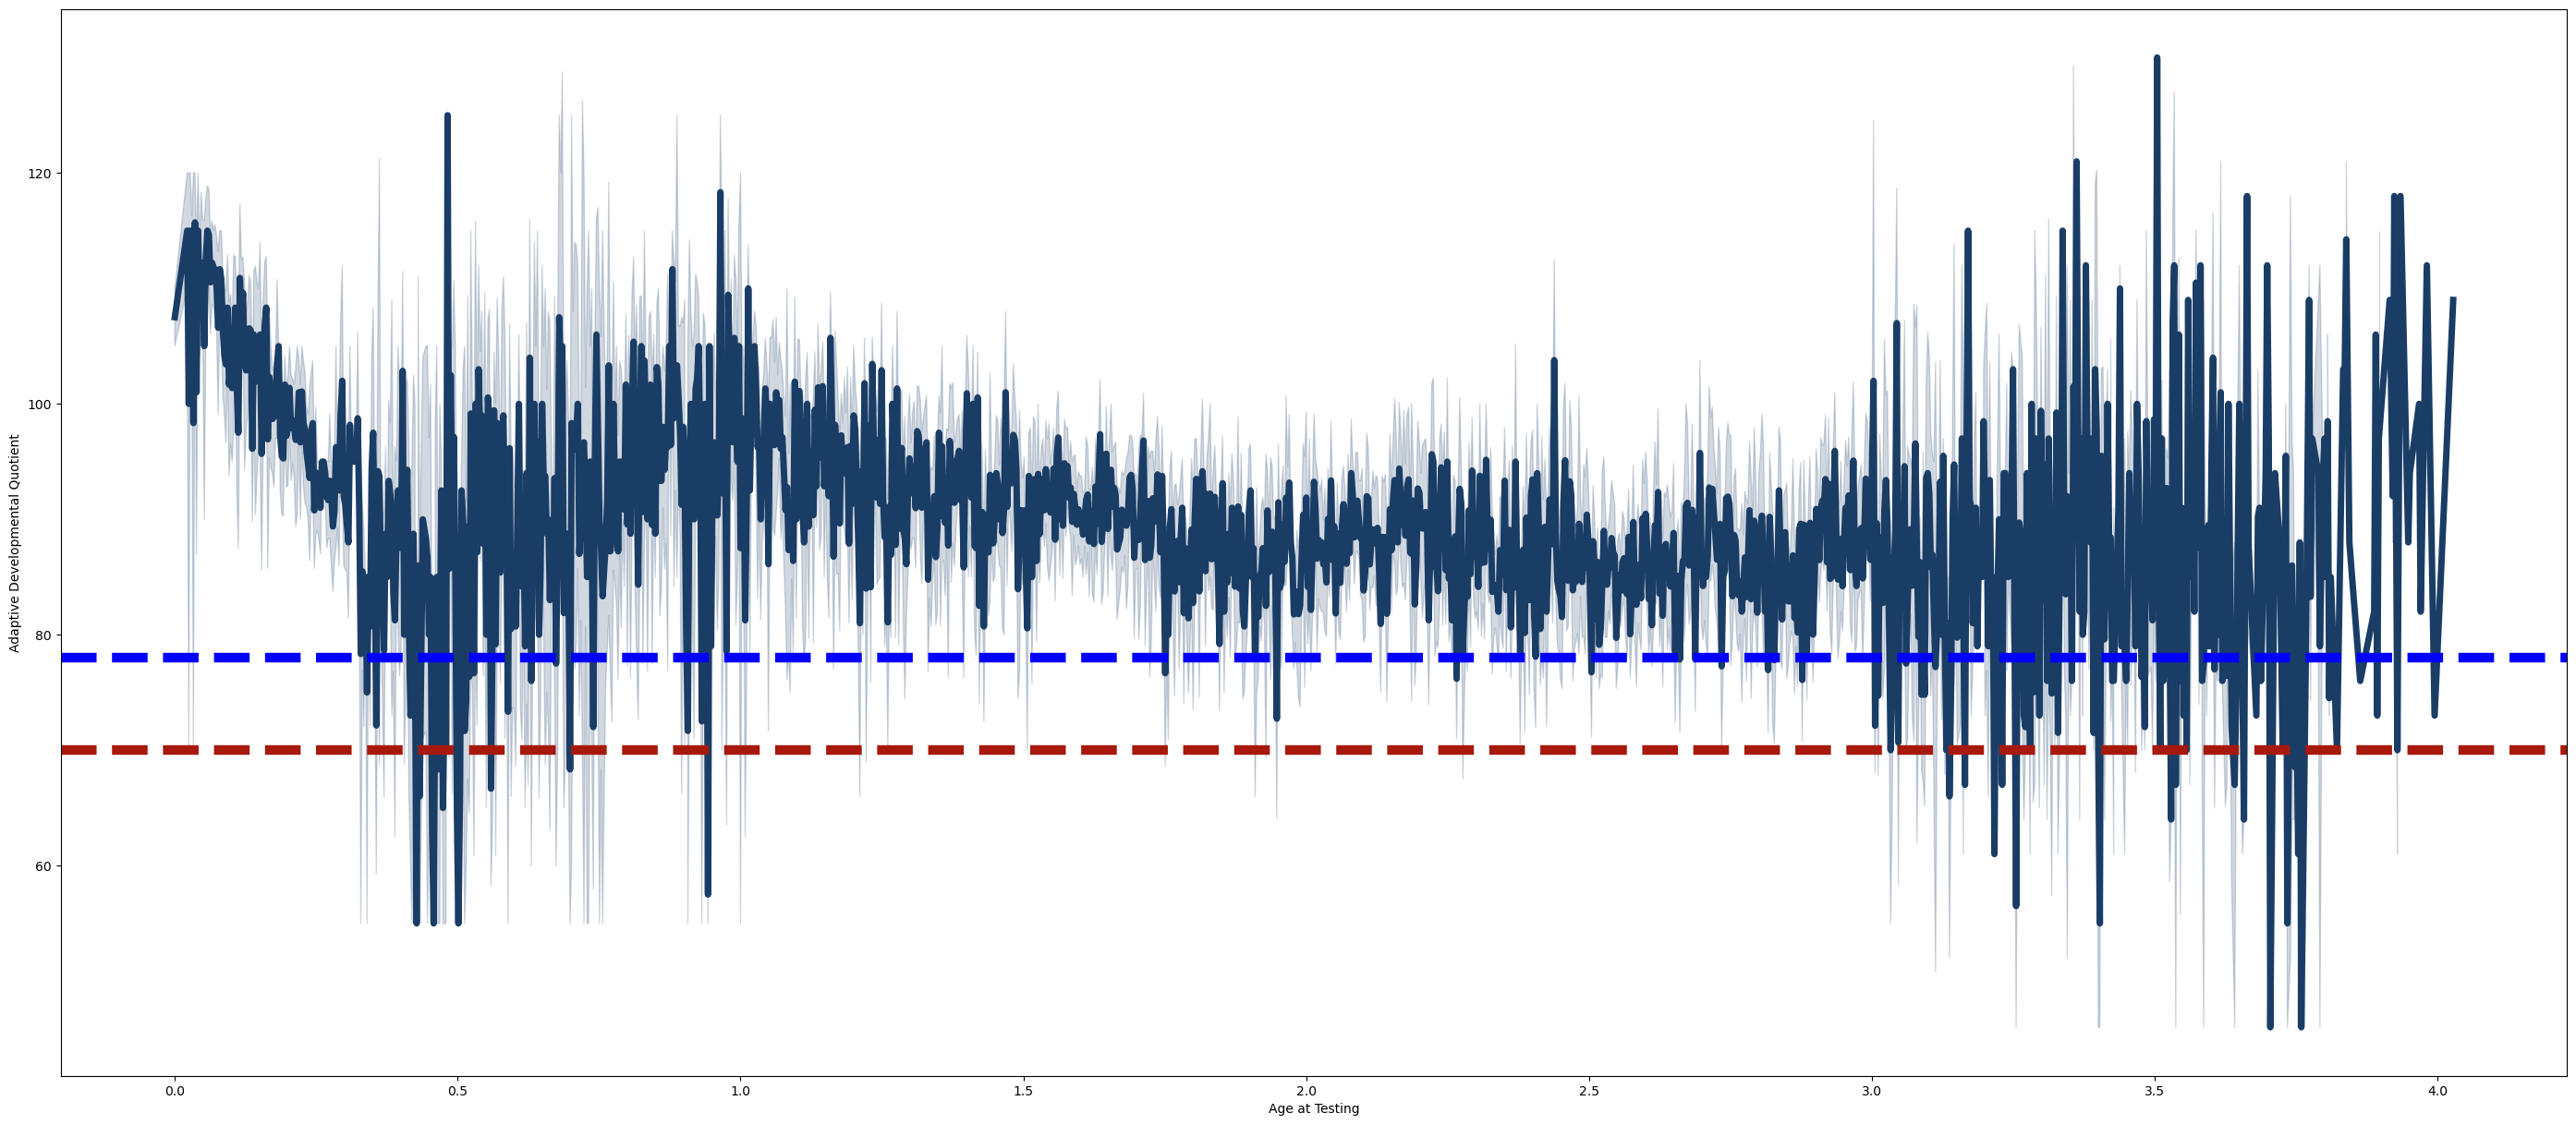

In [16]:
plt.figure(figsize=(35,15))

sns.lineplot(data=adapt_scores, x='Age at Testing', y='Adaptive Developmental Quotient', color='#1A3D66', linewidth=5)
plt.axhline(y=78, label='25% Delay', linestyle='--', color='blue', linewidth=7.5)
plt.axhline(y=70, label='40% Delay', linestyle='--', color='#a7190c', linewidth=7.5)

plt.savefig('../Plots/Adaptive_Scores.png')
plt.show()

...and for Cognitive scores

In [17]:
cog_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Cognitive Developmental Quotient', 'Cognitive Percentile Rank', 'Cognitive RDI']].dropna()
cog_scores.head()

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive RDI
0,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
1,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,46.0,<0.1,0.0
2,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,52.0,0.1,0.0
3,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,52.0,0.1,0.0
6,M,South Central,BDI-3 Annual Evaluation,3.753425,45,3,50.0,<0.1,0.0


In [18]:
cog_scores.sort_values(by = ['Cognitive Developmental Quotient', 'Age at Testing'], ascending = [False, False])

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive RDI
23926,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,160.0,>99.9,100.0
23927,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,160.0,>99.9,100.0
22280,F,South Central,BDI-3 Annual Evaluation,2.723288,32,2,148.0,99.9,100.0
23862,M,Upper Cumberland,BDI-3 Annual Evaluation,3.024658,36,3,146.0,99.9,100.0
23863,M,Upper Cumberland,BDI-3 Annual Evaluation,3.024658,36,3,146.0,99.9,100.0
...,...,...,...,...,...,...,...,...,...
1209,M,First Tennessee,BDI-3 Eligibility Evaluation,0.895890,10,0,40.0,<0.1,0.0
1134,M,First Tennessee,BDI-3 Eligibility Evaluation,0.819178,9,0,40.0,<0.1,0.0
1370,F,Southwest,BDI-3 Eligibility Evaluation,0.764384,9,0,40.0,<0.1,0.0
1408,M,Greater Nashville,BDI-3 Eligibility Evaluation,0.646575,7,0,40.0,<0.1,0.0


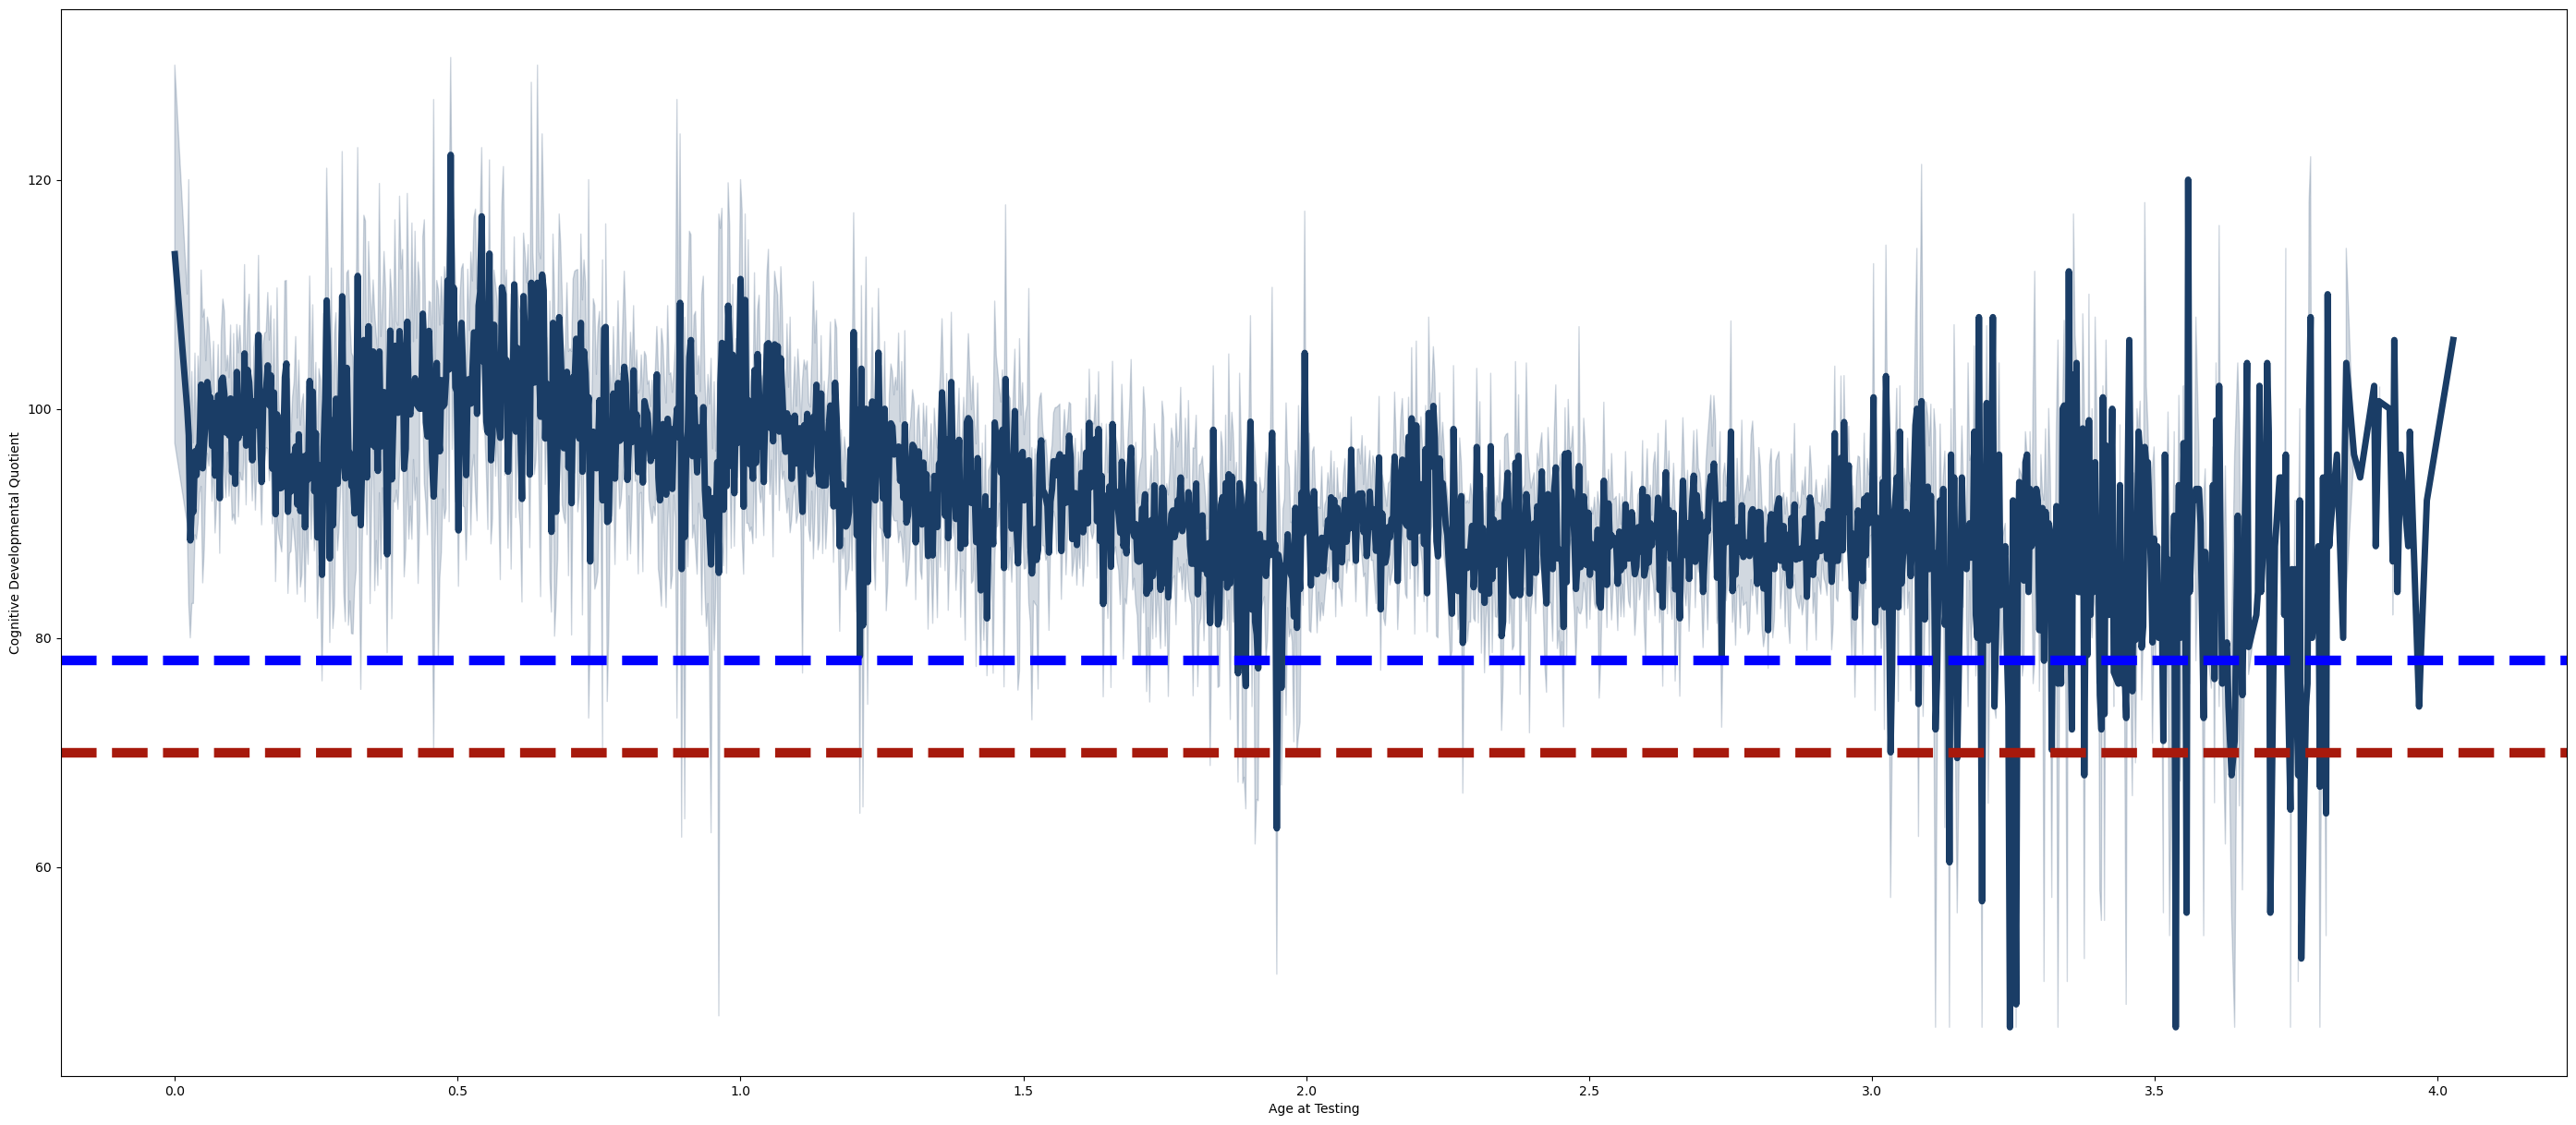

In [19]:
plt.figure(figsize=(35,15))

sns.lineplot(data=cog_scores, x='Age at Testing', y='Cognitive Developmental Quotient', color='#1A3D66', linewidth=5)
plt.axhline(y=78, label='25% Delay', linestyle='--', color='blue', linewidth=7.5)
plt.axhline(y=70, label='40% Delay', linestyle='--', color='#a7190c', linewidth=7.5)

plt.savefig('../Plots/Cognitive_Scores.png')
plt.show()

...and for Motor scores

In [20]:
motor_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Motor Developmental Quotient', 'Motor Percentile Rank', 'Motor RDI']].dropna()
motor_scores.head()

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Motor Developmental Quotient,Motor Percentile Rank,Motor RDI
0,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,42.0,<0.1,0.0
1,M,Upper Cumberland,BDI-3 Annual Evaluation,2.978082,35,2,42.0,<0.1,0.0
2,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,42.0,<0.1,0.0
3,F,Northwest,BDI-3 Annual Evaluation,3.758904,45,3,42.0,<0.1,0.0
4,M,Memphis Delta,BDI-3 Annual Evaluation,3.306849,39,3,42.0,<0.1,0.0


In [21]:
motor_scores.sort_values(by = ['Motor Developmental Quotient', 'Age at Testing'], ascending = [False, False])

,Gender,Location - Sub Level 1,Program Label,Age at Testing,months,years,Motor Developmental Quotient,Motor Percentile Rank,Motor RDI
23926,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,154.0,>99.9,100.0
23927,F,Upper Cumberland,BDI-3 Annual Evaluation,0.180822,2,0,154.0,>99.9,100.0
23931,M,Upper Cumberland,BDI-3 Annual Evaluation,1.545205,18,1,151.0,>99.9,100.0
23932,M,Upper Cumberland,BDI-3 Annual Evaluation,1.545205,18,1,151.0,>99.9,100.0
23347,F,Southeast Tennessee,BDI-3 Eligibility Evaluation,1.219178,14,1,151.0,>99.9,100.0
...,...,...,...,...,...,...,...,...,...
186,F,South Central,BDI-3 Annual Evaluation,2.057534,24,2,42.0,<0.1,0.0
187,F,South Central,BDI-3 Annual Evaluation,2.057534,24,2,42.0,<0.1,0.0
241,M,Greater Nashville,BDI-3 Annual Evaluation,2.052055,24,2,42.0,<0.1,0.0
242,M,Greater Nashville,BDI-3 Annual Evaluation,2.052055,24,2,42.0,<0.1,0.0


In [22]:
plt.figure(figsize=(35,15))

sns.lineplot(data=motor_scores, x='Age at Testing', y='Motor Developmental Quotient', color='#1A3D66', linewidth=5)
plt.axhline(y=78, label='25% Delay', linestyle='--', color='blue', linewidth=7.5)
plt.axhline(y=70, label='40% Delay', linestyle='--', color='#a7190c', linewidth=7.5)

plt.savefig('../Plots/Motor_Scores.png')
plt.show()

...and finally Scoial/Emotional scores

In [ ]:
scoial_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Social-Emotional Developmental Quotient', 'Social-Emotional Percentile Rank', 'Social-Emotional RDI']].dropna()
scoial_scores.head()

In [ ]:
scoial_scores.sort_values(by = ['Social-Emotional Developmental Quotient', 'Age at Testing'], ascending = [False, False])

In [ ]:
plt.figure(figsize=(35,15))

sns.lineplot(data=scoial_scores, x='Age at Testing', y='Social-Emotional Developmental Quotient', color='#1A3D66', linewidth=5)
plt.axhline(y=78, label='25% Delay', linestyle='--', color='blue', linewidth=7.5)
plt.axhline(y=70, label='40% Delay', linestyle='--', color='#a7190c', linewidth=7.5)

plt.savefig('../Plots/Social_Scores.png')
plt.show()

Look into communication scores by subdomain

In [ ]:
comm_sub_scores = evals[['Gender', 'Location - Sub Level 1', 'Program Label', 'Age at Testing', 'months', 'years', 'Communication Developmental Quotient', 'Communication Percentile Rank', 'Communication RDI']].dropna()
comm_sub_scores.head()